<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Networkx dataset examples

---

Appart from functions for generating particular types of graphs, Networkx contains several benchmark social network datasets. As they contain a fairly low number of nodes and links they are ideal for practising the concepts learned in the lesson.

### 1. Zachary's Karate Club graph: 

[Zachary's Karate Club](https://www.jstor.org/stable/3629752?seq=1#page_scan_tab_contents) graph is a result of a social science field study recording if 34 members of a Californian Karate Club were interacting outside the club. It is a benchmark for detecting communities in graphs as during the study a conflict between the administrator and the instructor of the club lead to a split with some members forming a new club.

If you are the first to mention this dataset on a network conference, you can win a trophy and become a member of the *Zachary Karate Club Club*:

<img src="./assets/images/Karate_Club_Trophy.jpg" style="width:500px;height:400px;">


### 2. The Florentine family graph: 

This is data about how the most important Florentine families in the early 15th century were connected by marriages among the families (Ronald L. Breiger and Philippa E. Pattison Cumulated social roles: The duality of persons and their algebras,1 Social Networks, Volume 8, Issue 3, September 1986, Pages 215-256). In fact, the time covered is just around the time that the Medici family had been expelled from Florence before returning to power, and the families represented here are known to have shown opposition to the Medici family.

### 3. The Davis Southern Women Graph

This dataset was collected by Davis and Gardner in the 1930s. It contains the observed attendance by 18 Southern women at 14 social events, presumably comparable to modern meet ups (A. Davis, Gardner, B. B., Gardner, M. R., 1941. Deep South. University of Chicago Press, Chicago, IL.).


In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import operator

from matplotlib import cm
from networkx.algorithms import bipartite
from scipy.cluster import hierarchy
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine, jaccard
from networkx.algorithms.community.centrality import girvan_newman
from scipy.cluster import hierarchy
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import pdist, cosine, jaccard

plt.style.use('ggplot') 
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [5]:
G_karate = nx.karate_club_graph()
G_florentine = nx.florentine_families_graph()
G_davis = nx.davis_southern_women_graph()

**Hints:** 
- load the datasets with the commands below
- the last graph is bipartite - obtain the clustering coefficients and shortest paths for the projections on top and bottom nodes
- for the Karate club graph, hierarchical clustering with two clusters should give you communities representing the actual split that occured in the group
- for the bipartite graph, consider communities of the whole graph and the graphs obtained by projecting on the two groups

## 1. For Zachary's Karate Club graph, find:

* the graph info.

In [10]:
nx.info(G_karate)

"Name: Zachary's Karate Club\nType: Graph\nNumber of nodes: 34\nNumber of edges: 78\nAverage degree:   4.5882"

* the list of nodes.

In [7]:
nx.nodes(G_karate)

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33))

* the list of edges.

In [9]:
nx.edges(G_karate)

EdgeView([(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 10), (0, 11), (0, 12), (0, 13), (0, 17), (0, 19), (0, 21), (0, 31), (1, 2), (1, 3), (1, 7), (1, 13), (1, 17), (1, 19), (1, 21), (1, 30), (2, 3), (2, 7), (2, 8), (2, 9), (2, 13), (2, 27), (2, 28), (2, 32), (3, 7), (3, 12), (3, 13), (4, 6), (4, 10), (5, 6), (5, 10), (5, 16), (6, 16), (8, 30), (8, 32), (8, 33), (9, 33), (13, 33), (14, 32), (14, 33), (15, 32), (15, 33), (18, 32), (18, 33), (19, 33), (20, 32), (20, 33), (22, 32), (22, 33), (23, 25), (23, 27), (23, 29), (23, 32), (23, 33), (24, 25), (24, 27), (24, 31), (25, 31), (26, 29), (26, 33), (27, 33), (28, 31), (28, 33), (29, 32), (29, 33), (30, 32), (30, 33), (31, 32), (31, 33), (32, 33)])

* the degree distribution (plot a histogram)

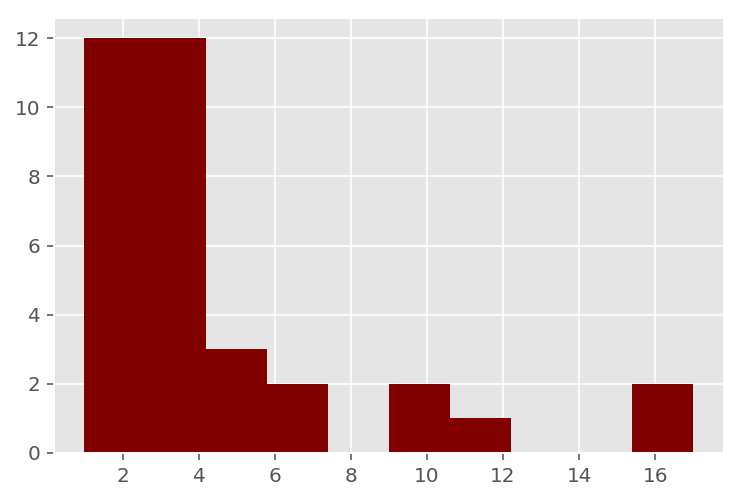

In [22]:
plt.hist(dict(nx.degree(G_karate)).values(), color = 'maroon');

* the clustering coefficients (for each node and the average, plot a histogram).

In [24]:
nx.clustering(G_karate)

{0: 0.15,
 1: 0.3333333333333333,
 2: 0.24444444444444444,
 3: 0.6666666666666666,
 4: 0.6666666666666666,
 5: 0.5,
 6: 0.5,
 7: 1.0,
 8: 0.5,
 9: 0,
 10: 0.6666666666666666,
 11: 0,
 12: 1.0,
 13: 0.6,
 14: 1.0,
 15: 1.0,
 16: 1.0,
 17: 1.0,
 18: 1.0,
 19: 0.3333333333333333,
 20: 1.0,
 21: 1.0,
 22: 1.0,
 23: 0.4,
 24: 0.3333333333333333,
 25: 0.3333333333333333,
 26: 1.0,
 27: 0.16666666666666666,
 28: 0.3333333333333333,
 29: 0.6666666666666666,
 30: 0.5,
 31: 0.2,
 32: 0.19696969696969696,
 33: 0.11029411764705882}

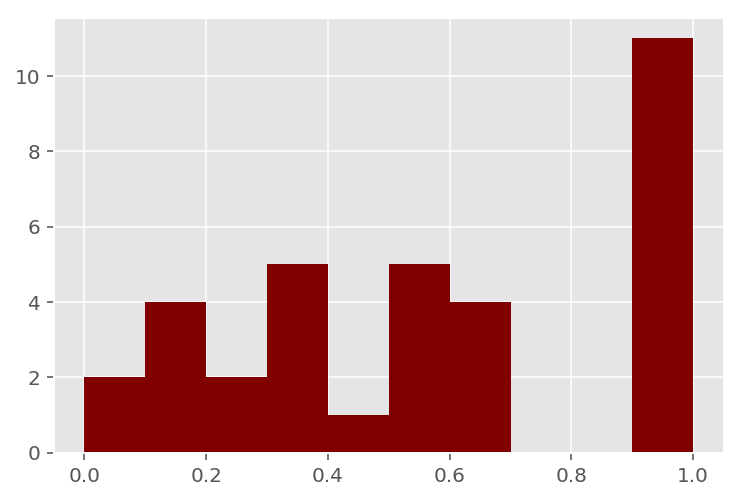

In [25]:
plt.hist(nx.clustering(G_karate).values(), color = 'maroon');

* the shortest paths for the nodes and their average length.

In [28]:
pd.DataFrame(dict(nx.shortest_path_length(G_karate)))

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,0,1,1,1,1,1,1,1,1,2,...,2,2,3,2,2,3,2,1,2,2
1,1,0,1,1,2,2,2,1,2,2,...,3,3,3,2,2,3,1,2,2,2
2,1,1,0,1,2,2,2,1,1,1,...,2,3,3,1,1,2,2,2,1,2
3,1,1,1,0,2,2,2,1,2,2,...,3,3,3,2,2,3,2,2,2,2
4,1,2,2,2,0,2,1,2,2,3,...,3,3,4,3,3,4,3,2,3,3
5,1,2,2,2,2,0,1,2,2,3,...,3,3,4,3,3,4,3,2,3,3
6,1,2,2,2,1,1,0,2,2,3,...,3,3,4,3,3,4,3,2,3,3
7,1,1,1,1,2,2,2,0,2,2,...,3,3,4,2,2,3,2,2,2,3
8,1,2,1,2,2,2,2,2,0,2,...,3,3,2,2,2,2,1,2,1,1
9,2,2,1,2,3,3,3,2,2,0,...,3,3,2,2,2,2,2,2,2,1


* obtain the vertex and edge betweenness ranking for each graph.

In [29]:
nx.betweenness_centrality(G_karate)

{0: 0.43763528138528146,
 1: 0.053936688311688304,
 2: 0.14365680615680618,
 3: 0.011909271284271283,
 4: 0.0006313131313131313,
 5: 0.02998737373737374,
 6: 0.029987373737373736,
 7: 0.0,
 8: 0.05592682780182781,
 9: 0.0008477633477633478,
 10: 0.0006313131313131313,
 11: 0.0,
 12: 0.0,
 13: 0.04586339586339586,
 14: 0.0,
 15: 0.0,
 16: 0.0,
 17: 0.0,
 18: 0.0,
 19: 0.03247504810004811,
 20: 0.0,
 21: 0.0,
 22: 0.0,
 23: 0.017613636363636363,
 24: 0.0022095959595959595,
 25: 0.0038404882154882154,
 26: 0.0,
 27: 0.02233345358345358,
 28: 0.0017947330447330447,
 29: 0.0029220779220779218,
 30: 0.014411976911976909,
 31: 0.13827561327561325,
 32: 0.145247113997114,
 33: 0.30407497594997596}

In [30]:
nx.edge_betweenness_centrality(G_karate)

{(0, 1): 0.025252525252525245,
 (0, 2): 0.0777876807288572,
 (0, 3): 0.02049910873440285,
 (0, 4): 0.0522875816993464,
 (0, 5): 0.07813428401663694,
 (0, 6): 0.07813428401663695,
 (0, 7): 0.0228206434088787,
 (0, 8): 0.07423959482783014,
 (0, 10): 0.0522875816993464,
 (0, 11): 0.058823529411764705,
 (0, 12): 0.04652406417112298,
 (0, 13): 0.04237189825425121,
 (0, 17): 0.04012392835922248,
 (0, 19): 0.045936960642843,
 (0, 21): 0.040123928359222474,
 (0, 31): 0.1272599949070537,
 (1, 2): 0.023232323232323233,
 (1, 3): 0.0077243018419489,
 (1, 7): 0.007422969187675069,
 (1, 13): 0.01240556828792123,
 (1, 17): 0.01869960105254222,
 (1, 19): 0.014633732280791102,
 (1, 21): 0.01869960105254222,
 (1, 30): 0.032280791104320514,
 (2, 3): 0.022430184194890075,
 (2, 7): 0.025214328155504617,
 (2, 8): 0.009175791528732704,
 (2, 9): 0.030803836686189627,
 (2, 13): 0.007630931160342923,
 (2, 27): 0.04119203236850296,
 (2, 28): 0.02278244631185807,
 (2, 32): 0.06898678663384543,
 (3, 7): 0.00336558

* plot the graph.

C:\Users\HP-PC\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


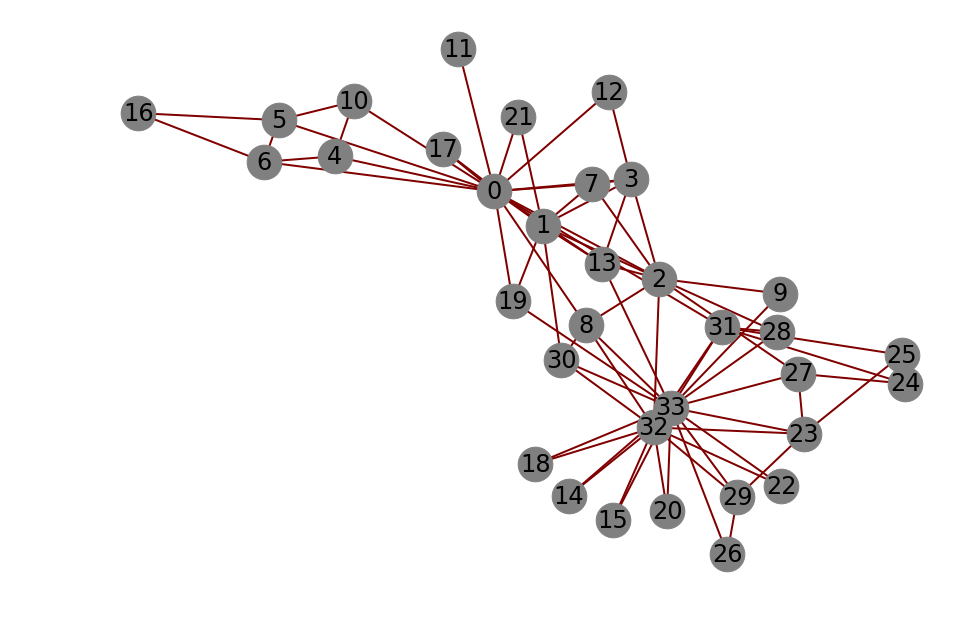

In [49]:
nx.draw(G_karate, with_labels = True, node_color = 'gray', edge_color = 'maroon')

* use the Girvan-Newman algorithm for community detection.

deleting edge: (0, 31) ...we have now  1  components
deleting edge: (0, 2) ...we have now  1  components
deleting edge: (0, 8) ...we have now  1  components
deleting edge: (13, 33) ...we have now  1  components
deleting edge: (19, 33) ...we have now  1  components
deleting edge: (2, 32) ...we have now  1  components
deleting edge: (1, 30) ...we have now  1  components
deleting edge: (1, 2) ...we have now  1  components
deleting edge: (2, 3) ...we have now  1  components
deleting edge: (2, 13) ...we have now  1  components
deleting edge: (2, 7) ...we have now  2  components


C:\Users\HP-PC\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


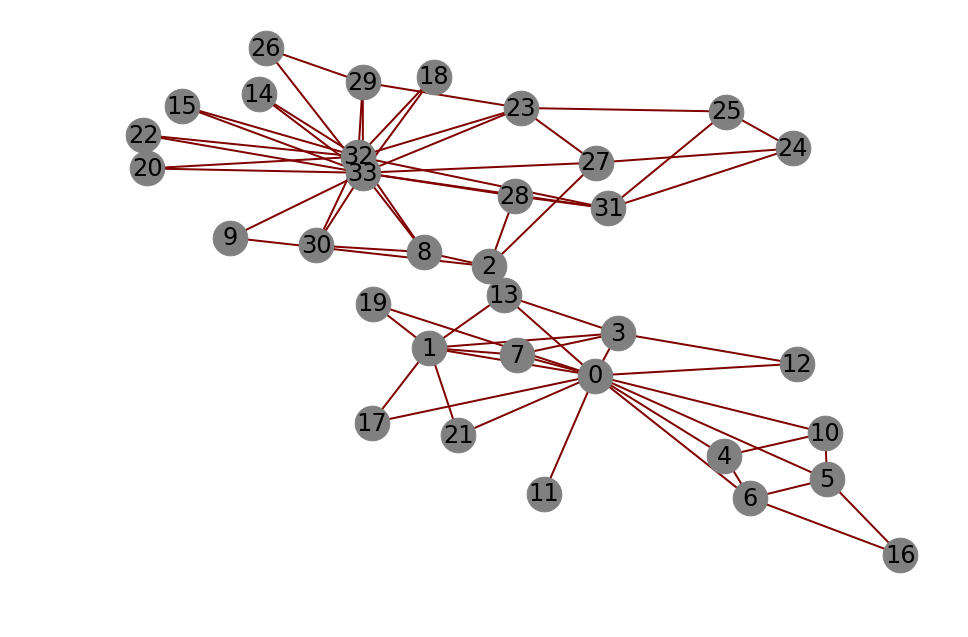

deleting edge: (9, 33) ...we have now  2  components
deleting edge: (27, 33) ...we have now  2  components
deleting edge: (2, 9) ...we have now  3  components


C:\Users\HP-PC\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


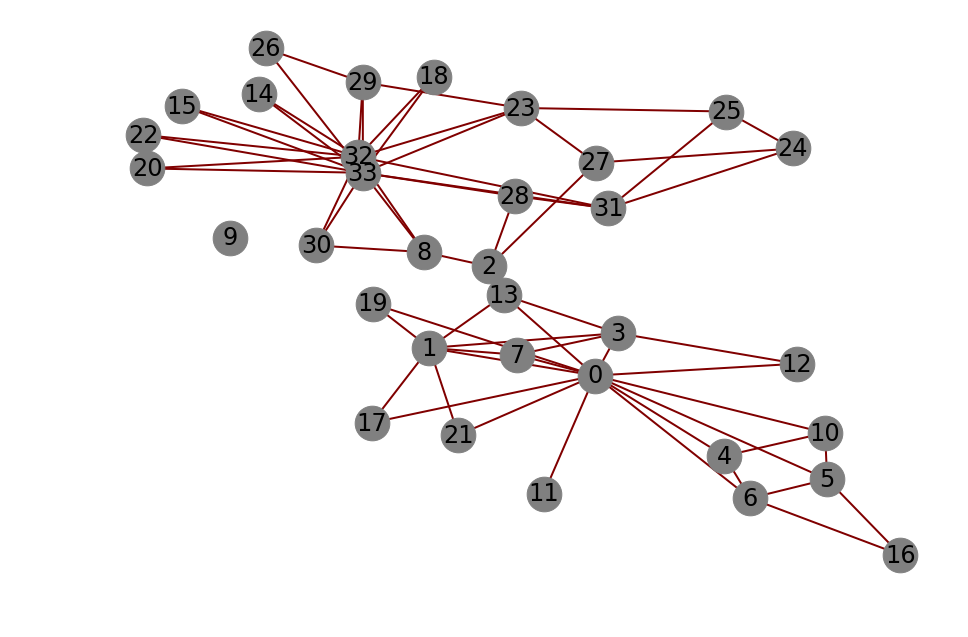

deleting edge: (0, 6) ...we have now  3  components
deleting edge: (0, 5) ...we have now  3  components
deleting edge: (0, 10) ...we have now  3  components
deleting edge: (0, 4) ...we have now  4  components


C:\Users\HP-PC\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


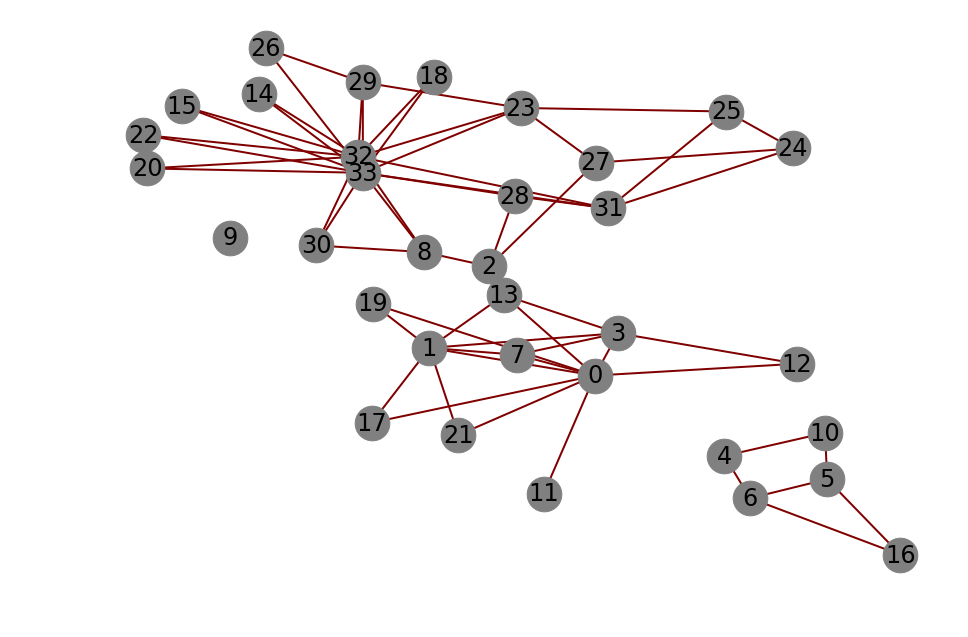

deleting edge: (31, 33) ...we have now  4  components
deleting edge: (31, 32) ...we have now  4  components
deleting edge: (28, 33) ...we have now  4  components
deleting edge: (23, 25) ...we have now  4  components
deleting edge: (23, 27) ...we have now  4  components
deleting edge: (2, 8) ...we have now  5  components


C:\Users\HP-PC\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


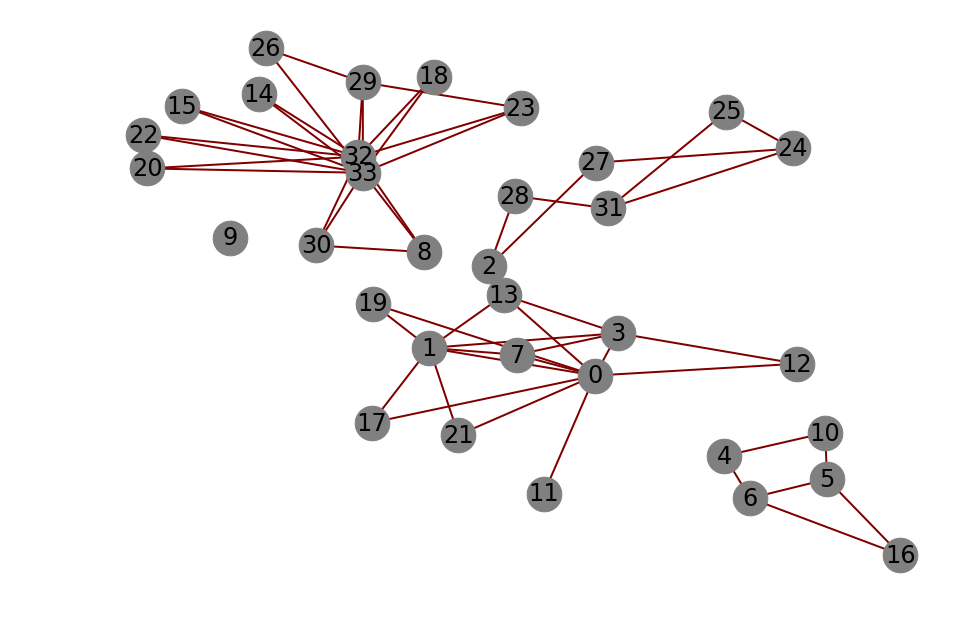

deleting edge: (26, 33) ...we have now  5  components
deleting edge: (26, 29) ...we have now  6  components


C:\Users\HP-PC\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


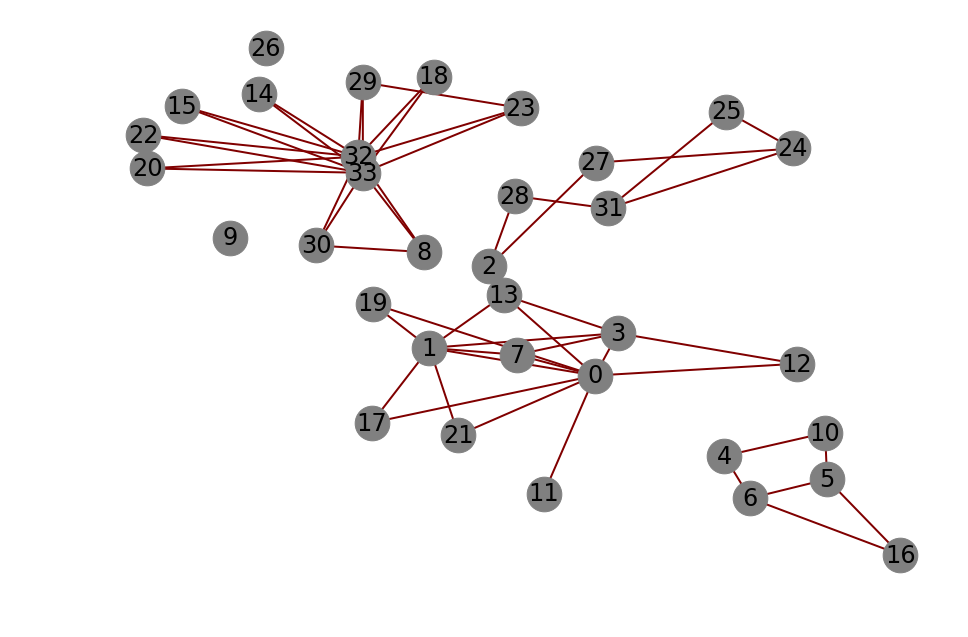

deleting edge: (0, 11) ...we have now  7  components
deleting edge: (0, 12) ...we have now  7  components
deleting edge: (3, 12) ...we have now  8  components
deleting edge: (22, 33) ...we have now  8  components
deleting edge: (22, 32) ...we have now  9  components
deleting edge: (28, 31) ...we have now  9  components
deleting edge: (24, 27) ...we have now  10  components
deleting edge: (20, 33) ...we have now  10  components
deleting edge: (20, 32) ...we have now  11  components
deleting edge: (18, 33) ...we have now  11  components
deleting edge: (18, 32) ...we have now  12  components
deleting edge: (15, 33) ...we have now  12  components
deleting edge: (15, 32) ...we have now  13  components
deleting edge: (1, 21) ...we have now  13  components
deleting edge: (0, 21) ...we have now  14  components
deleting edge: (14, 33) ...we have now  14  components
deleting edge: (14, 32) ...we have now  15  components
deleting edge: (5, 10) ...we have now  15  components
deleting edge: (4, 6) 

In [50]:
def Girvan_Newman(G_1):
    G = G_1.copy()
    pos = nx.drawing.spring_layout(G)
    sorted_bc = [1]
    actual_number_components = 1
    while not sorted_bc == []:
        d_edge = nx.edge_betweenness_centrality(G)
        sorted_bc = sorted(list(d_edge.items()), key=operator.itemgetter(1))
        e = sorted_bc.pop()
        print("deleting edge:", e[0], end=' ')
        G.remove_edge(*e[0])
        num_comp = nx.number_connected_components(G)
        print("...we have now ",num_comp," components")
        if num_comp > actual_number_components:
            actual_number_components = num_comp
            if num_comp < 7:
                nx.draw(G, pos,with_labels=True, node_color = 'gray', edge_color = 'maroon')
                plt.show()
                
Girvan_Newman(G_karate)

* use hierarchical clustering for community detection.
    - do you see any differences in the community structure resulting from the two algorithms?

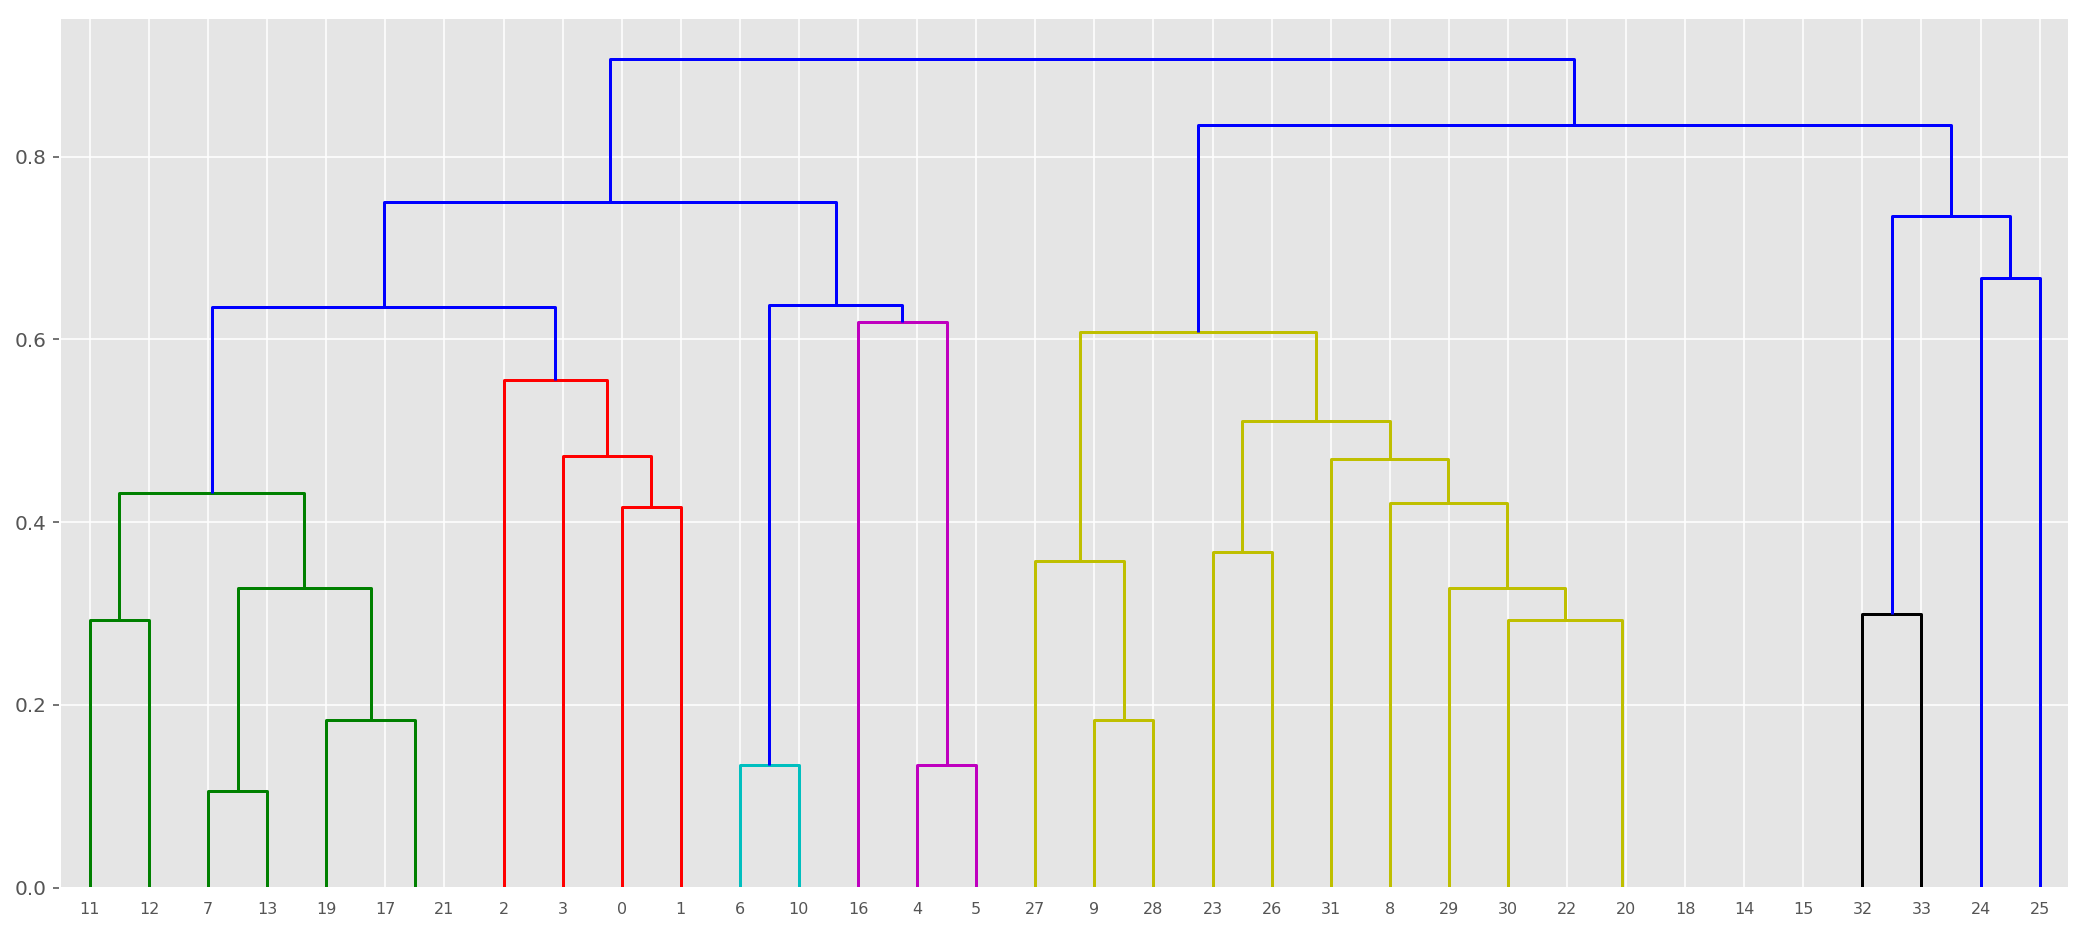

In [44]:
plt.figure(figsize=(18, 8))
A = nx.adjacency_matrix(G_karate).toarray()
dist_out = pdist(A,metric='cosine')
Z = hierarchy.linkage(dist_out,method='average')
hierarchy.dendrogram(Z,leaf_rotation=0,labels=list(G_karate.nodes()))
plt.show()

## 2. For Florentine family graph, find:

* the graph info.

In [53]:
nx.info(G_florentine)

'Name: \nType: Graph\nNumber of nodes: 15\nNumber of edges: 20\nAverage degree:   2.6667'

* the list of nodes.

In [54]:
nx.nodes(G_florentine)

NodeView(('Acciaiuoli', 'Medici', 'Castellani', 'Peruzzi', 'Strozzi', 'Barbadori', 'Ridolfi', 'Tornabuoni', 'Albizzi', 'Salviati', 'Pazzi', 'Bischeri', 'Guadagni', 'Ginori', 'Lamberteschi'))

* the list of edges.

In [55]:
nx.edges(G_florentine)

EdgeView([('Acciaiuoli', 'Medici'), ('Medici', 'Barbadori'), ('Medici', 'Ridolfi'), ('Medici', 'Tornabuoni'), ('Medici', 'Albizzi'), ('Medici', 'Salviati'), ('Castellani', 'Peruzzi'), ('Castellani', 'Strozzi'), ('Castellani', 'Barbadori'), ('Peruzzi', 'Strozzi'), ('Peruzzi', 'Bischeri'), ('Strozzi', 'Ridolfi'), ('Strozzi', 'Bischeri'), ('Ridolfi', 'Tornabuoni'), ('Tornabuoni', 'Guadagni'), ('Albizzi', 'Ginori'), ('Albizzi', 'Guadagni'), ('Salviati', 'Pazzi'), ('Bischeri', 'Guadagni'), ('Guadagni', 'Lamberteschi')])

* the degree distribution (plot a histogram)

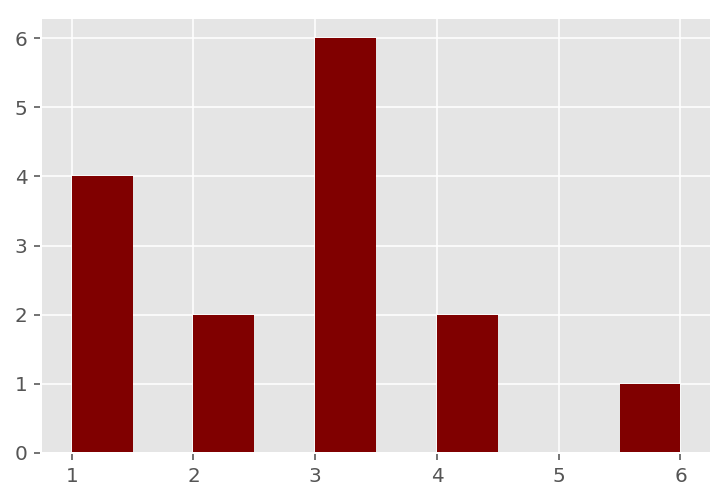

In [56]:
plt.hist(dict(nx.degree(G_florentine)).values(), color = 'maroon');

* the clustering coefficients (for each node and the average, plot a histogram).

In [57]:
nx.clustering(G_florentine)

{'Acciaiuoli': 0,
 'Medici': 0.06666666666666667,
 'Castellani': 0.3333333333333333,
 'Peruzzi': 0.6666666666666666,
 'Strozzi': 0.3333333333333333,
 'Barbadori': 0,
 'Ridolfi': 0.3333333333333333,
 'Tornabuoni': 0.3333333333333333,
 'Albizzi': 0,
 'Salviati': 0,
 'Pazzi': 0,
 'Bischeri': 0.3333333333333333,
 'Guadagni': 0,
 'Ginori': 0,
 'Lamberteschi': 0}

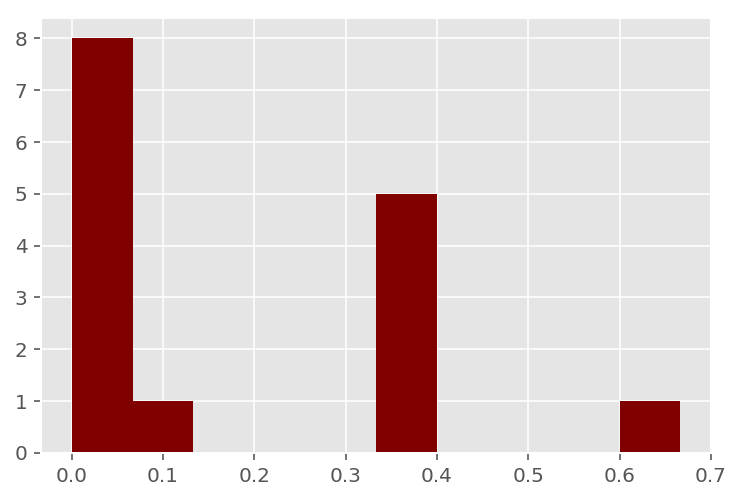

In [59]:
plt.hist(nx.clustering(G_florentine).values(), color = 'maroon');

* the shortest paths for the nodes and their average length.

In [60]:
pd.DataFrame(dict(nx.shortest_path_length(G_florentine)))

,Acciaiuoli,Medici,Castellani,Peruzzi,Strozzi,Barbadori,Ridolfi,Tornabuoni,Albizzi,Salviati,Pazzi,Bischeri,Guadagni,Ginori,Lamberteschi
Acciaiuoli,0,1,3,4,3,2,2,2,2,2,3,4,3,3,4
Albizzi,2,1,3,3,3,2,2,2,0,2,3,2,1,1,2
Barbadori,2,1,1,2,2,0,2,2,2,2,3,3,3,3,4
Bischeri,4,3,2,1,1,3,2,2,2,4,5,0,1,3,2
Castellani,3,2,0,1,1,1,2,3,3,3,4,2,3,4,4
Ginori,3,2,4,4,4,3,3,3,1,3,4,3,2,0,3
Guadagni,3,2,3,2,2,3,2,1,1,3,4,1,0,2,1
Lamberteschi,4,3,4,3,3,4,3,2,2,4,5,2,1,3,0
Medici,1,0,2,3,2,1,1,1,1,1,2,3,2,2,3
Pazzi,3,2,4,5,4,3,3,3,3,1,0,5,4,4,5


* obtain the vertex and edge betweenness ranking for each graph.

In [61]:
nx.betweenness_centrality(G_florentine)

{'Acciaiuoli': 0.0,
 'Medici': 0.521978021978022,
 'Castellani': 0.05494505494505495,
 'Peruzzi': 0.02197802197802198,
 'Strozzi': 0.10256410256410257,
 'Barbadori': 0.09340659340659341,
 'Ridolfi': 0.11355311355311355,
 'Tornabuoni': 0.09157509157509157,
 'Albizzi': 0.21245421245421245,
 'Salviati': 0.14285714285714288,
 'Pazzi': 0.0,
 'Bischeri': 0.1043956043956044,
 'Guadagni': 0.2545787545787546,
 'Ginori': 0.0,
 'Lamberteschi': 0.0}

In [62]:
nx.edge_betweenness_centrality(G_florentine)

{('Acciaiuoli', 'Medici'): 0.13333333333333336,
 ('Medici', 'Barbadori'): 0.1761904761904762,
 ('Medici', 'Ridolfi'): 0.146031746031746,
 ('Medici', 'Tornabuoni'): 0.12222222222222222,
 ('Medici', 'Albizzi'): 0.21269841269841266,
 ('Medici', 'Salviati'): 0.24761904761904763,
 ('Castellani', 'Peruzzi'): 0.05714285714285715,
 ('Castellani', 'Strozzi'): 0.05238095238095239,
 ('Castellani', 'Barbadori'): 0.11904761904761905,
 ('Peruzzi', 'Strozzi'): 0.04285714285714286,
 ('Peruzzi', 'Bischeri'): 0.07142857142857144,
 ('Strozzi', 'Ridolfi'): 0.1365079365079365,
 ('Strozzi', 'Bischeri'): 0.07936507936507937,
 ('Ridolfi', 'Tornabuoni'): 0.04761904761904762,
 ('Tornabuoni', 'Guadagni'): 0.12222222222222223,
 ('Albizzi', 'Ginori'): 0.13333333333333336,
 ('Albizzi', 'Guadagni'): 0.15555555555555559,
 ('Salviati', 'Pazzi'): 0.13333333333333336,
 ('Bischeri', 'Guadagni'): 0.1634920634920635,
 ('Guadagni', 'Lamberteschi'): 0.13333333333333336}

* plot the graph.

C:\Users\HP-PC\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


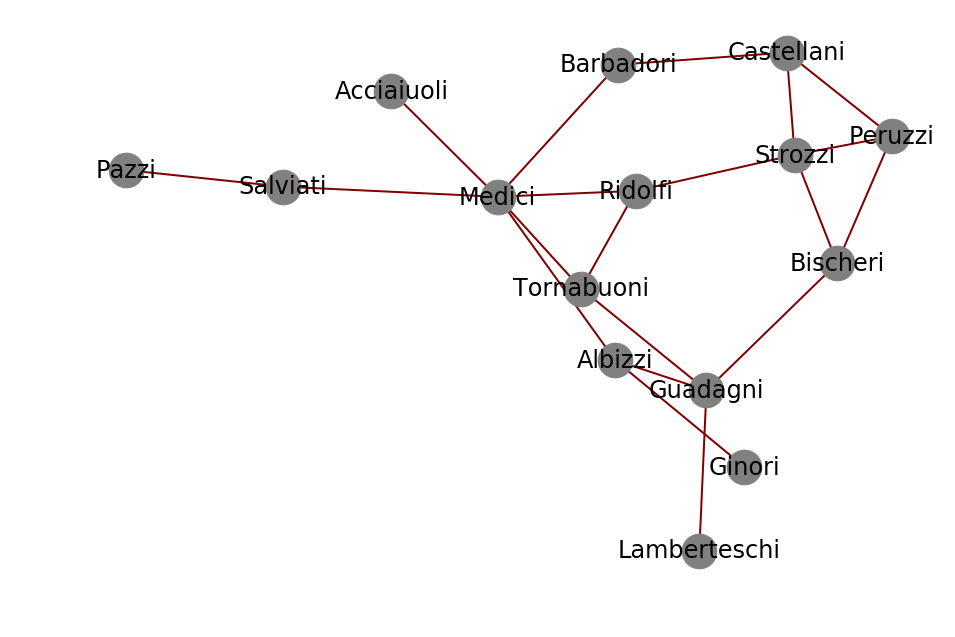

In [63]:
nx.draw(G_florentine, with_labels = True, node_color = 'gray', edge_color = 'maroon')

* use the Girvan-Newman algorithm for community detection.

deleting edge: ('Medici', 'Salviati') ...we have now  2  components


C:\Users\HP-PC\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


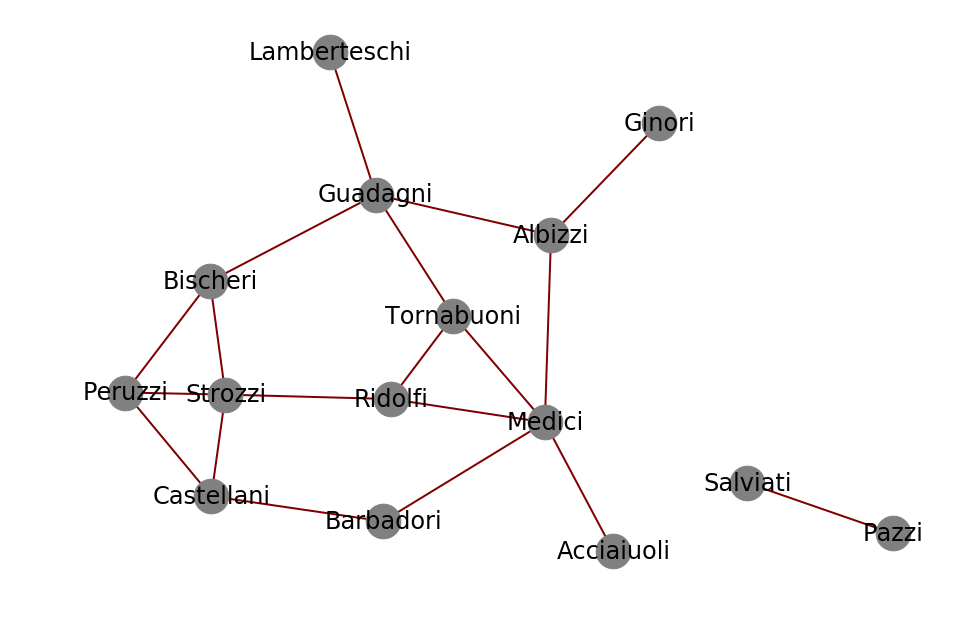

deleting edge: ('Bischeri', 'Guadagni') ...we have now  2  components
deleting edge: ('Strozzi', 'Ridolfi') ...we have now  2  components
deleting edge: ('Medici', 'Barbadori') ...we have now  3  components


C:\Users\HP-PC\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


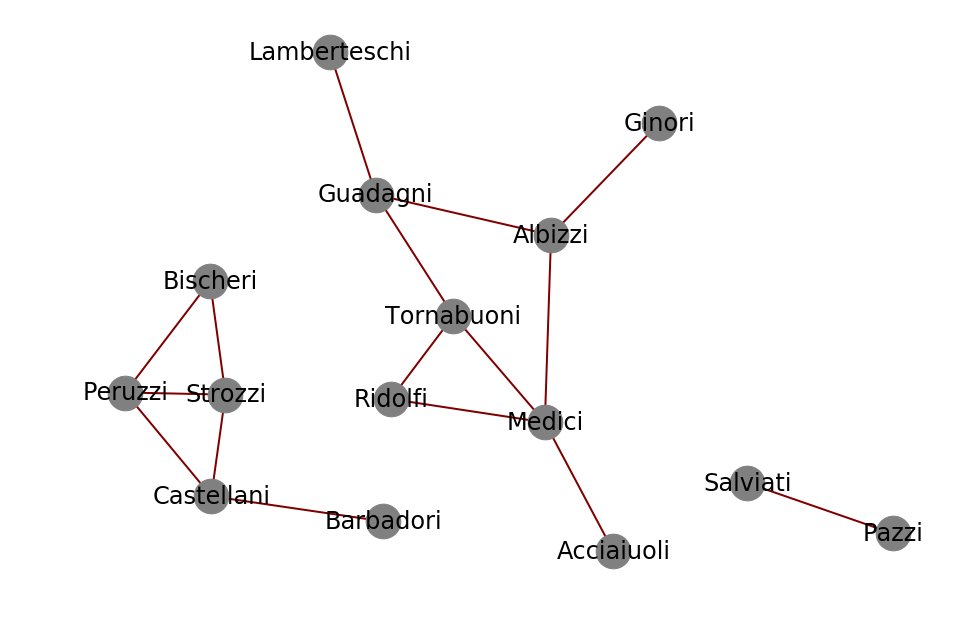

deleting edge: ('Medici', 'Albizzi') ...we have now  3  components
deleting edge: ('Tornabuoni', 'Guadagni') ...we have now  4  components


C:\Users\HP-PC\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


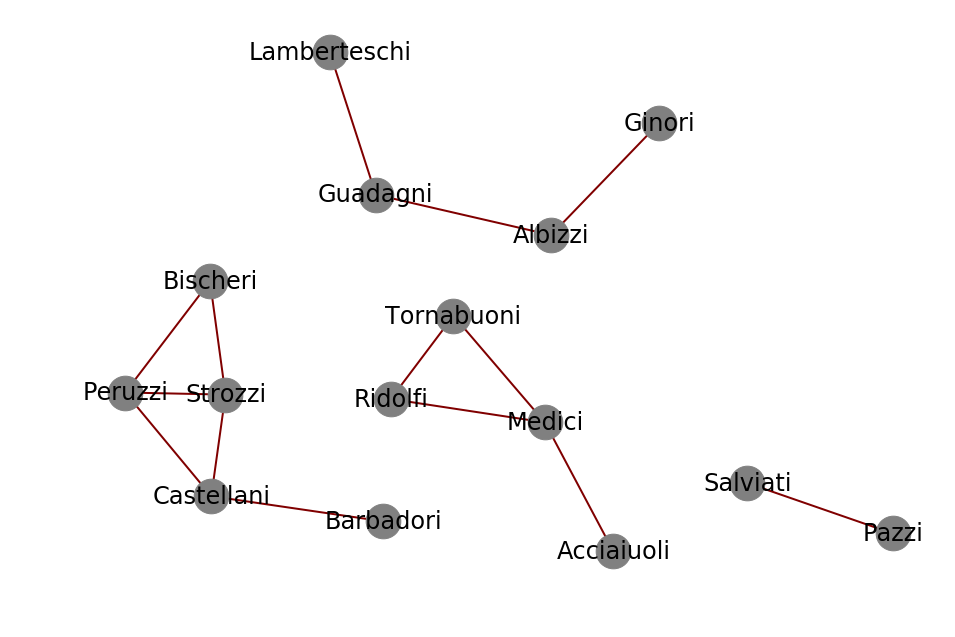

deleting edge: ('Albizzi', 'Guadagni') ...we have now  5  components


C:\Users\HP-PC\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


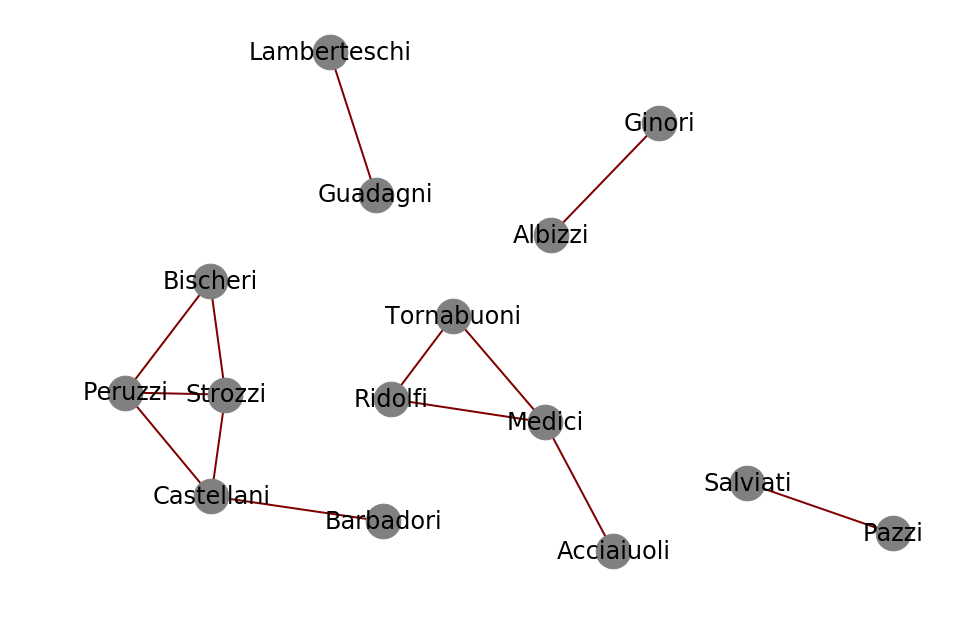

deleting edge: ('Castellani', 'Barbadori') ...we have now  6  components


C:\Users\HP-PC\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


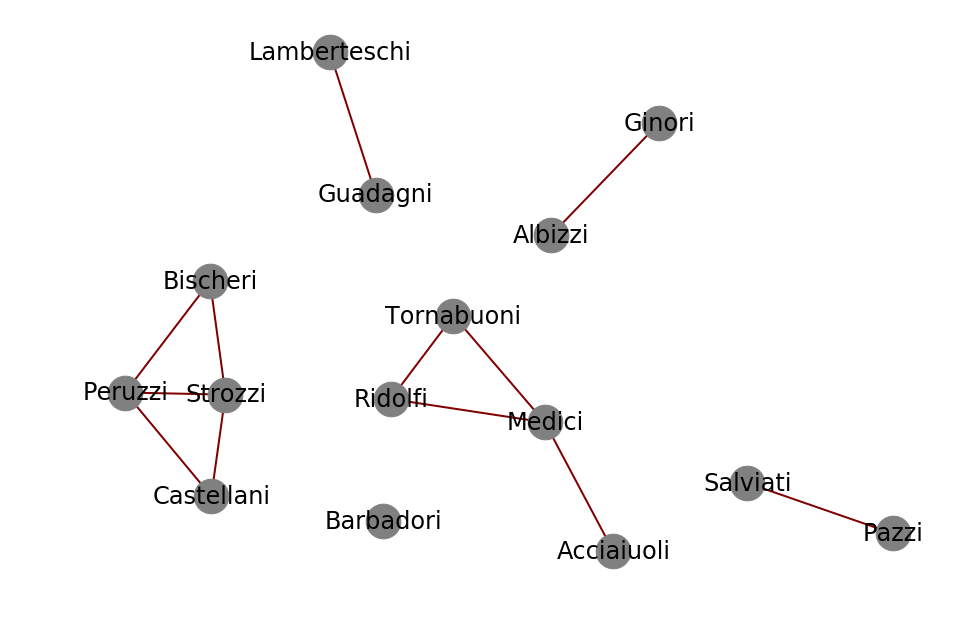

deleting edge: ('Acciaiuoli', 'Medici') ...we have now  7  components
deleting edge: ('Strozzi', 'Bischeri') ...we have now  7  components
deleting edge: ('Peruzzi', 'Bischeri') ...we have now  8  components
deleting edge: ('Guadagni', 'Lamberteschi') ...we have now  9  components
deleting edge: ('Salviati', 'Pazzi') ...we have now  10  components
deleting edge: ('Albizzi', 'Ginori') ...we have now  11  components
deleting edge: ('Ridolfi', 'Tornabuoni') ...we have now  11  components
deleting edge: ('Medici', 'Tornabuoni') ...we have now  12  components
deleting edge: ('Peruzzi', 'Strozzi') ...we have now  12  components
deleting edge: ('Castellani', 'Strozzi') ...we have now  13  components
deleting edge: ('Castellani', 'Peruzzi') ...we have now  14  components
deleting edge: ('Medici', 'Ridolfi') ...we have now  15  components


In [64]:
def Girvan_Newman(G_1):
    G = G_1.copy()
    pos = nx.drawing.spring_layout(G)
    sorted_bc = [1]
    actual_number_components = 1
    while not sorted_bc == []:
        d_edge = nx.edge_betweenness_centrality(G)
        sorted_bc = sorted(list(d_edge.items()), key=operator.itemgetter(1))
        e = sorted_bc.pop()
        print("deleting edge:", e[0], end=' ')
        G.remove_edge(*e[0])
        num_comp = nx.number_connected_components(G)
        print("...we have now ",num_comp," components")
        if num_comp > actual_number_components:
            actual_number_components = num_comp
            if num_comp < 7:
                nx.draw(G, pos,with_labels=True, node_color = 'gray', edge_color = 'maroon')
                plt.show()
                
Girvan_Newman(G_florentine)

* use hierarchical clustering for community detection.
    - do you see any differences in the community structure resulting from the two algorithms?

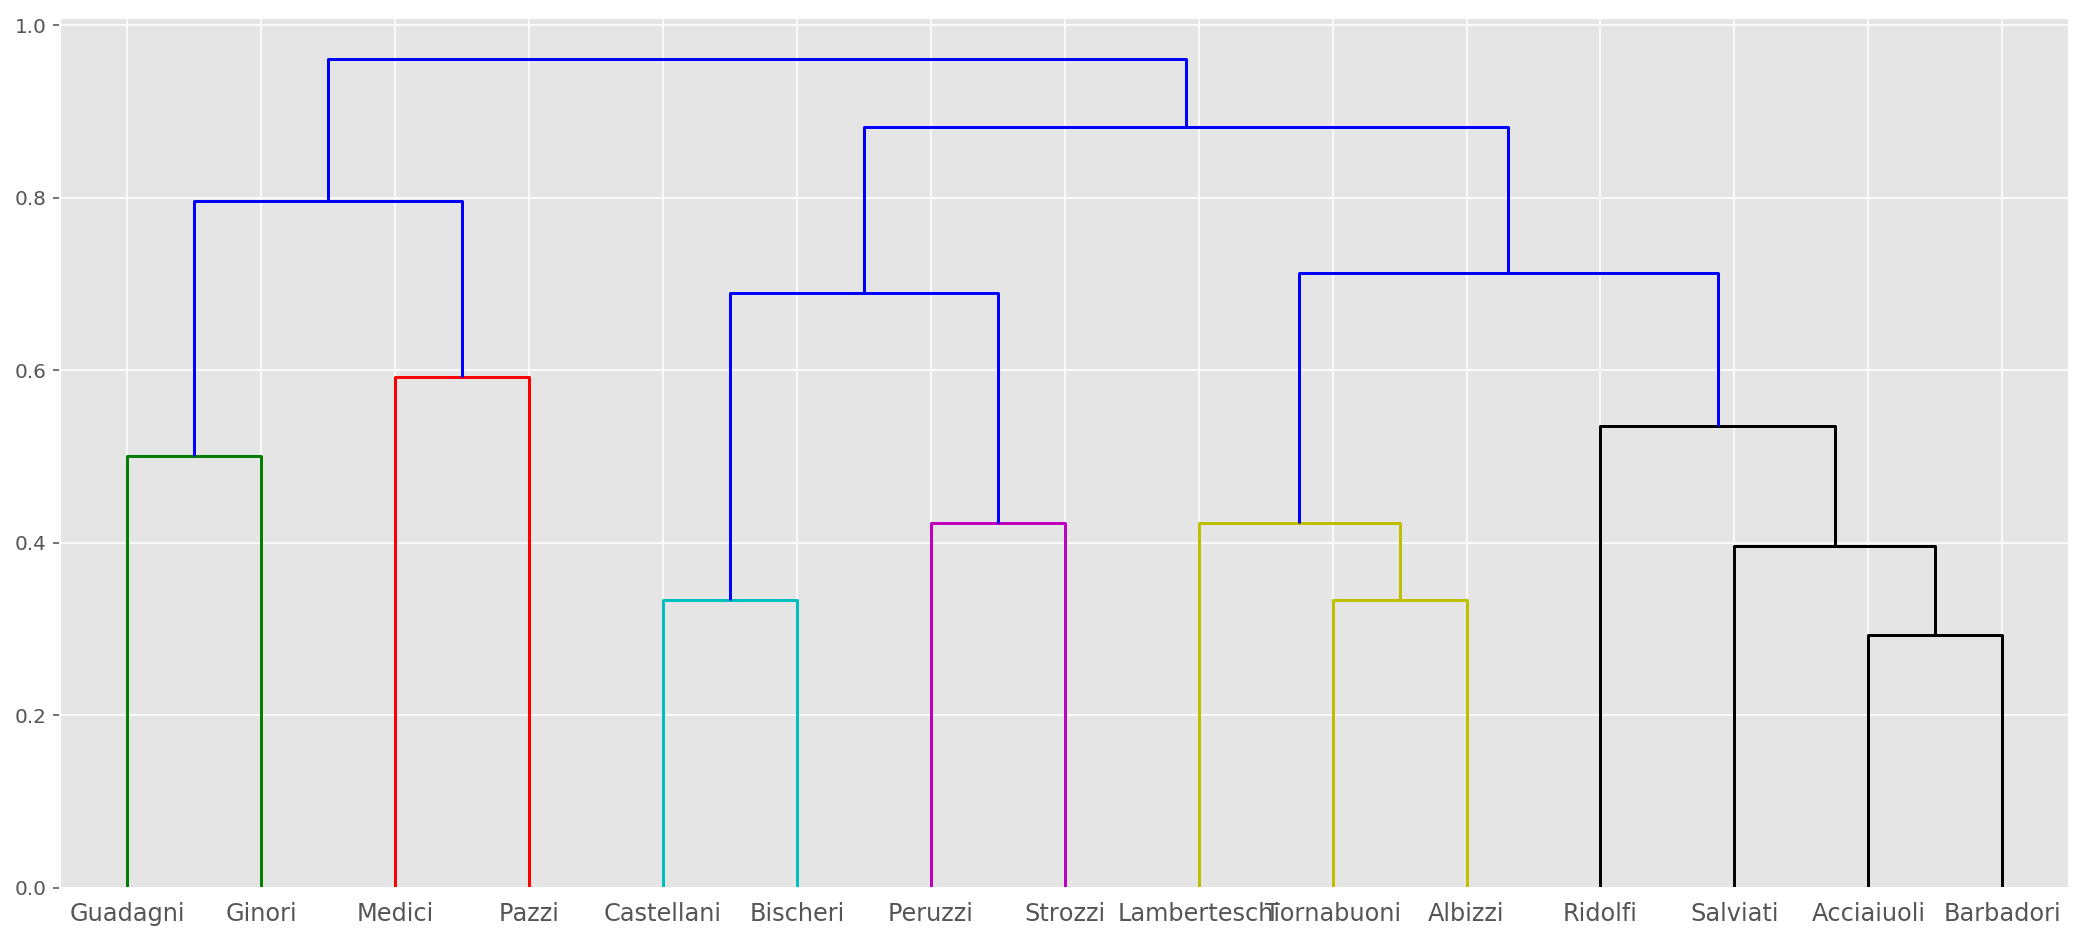

In [65]:
plt.figure(figsize=(18, 8))
A = nx.adjacency_matrix(G_florentine).toarray()
dist_out = pdist(A,metric='cosine')
Z = hierarchy.linkage(dist_out,method='average')
hierarchy.dendrogram(Z,leaf_rotation=0,labels=list(G_florentine.nodes()))
plt.show()

## 3. For Davis Southern Women graph, find:

* the graph info.

In [66]:
nx.info(G_davis)

'Name: \nType: Graph\nNumber of nodes: 32\nNumber of edges: 89\nAverage degree:   5.5625'

* the list of nodes.

In [67]:
nx.nodes(G_davis)

NodeView(('Evelyn Jefferson', 'Laura Mandeville', 'Theresa Anderson', 'Brenda Rogers', 'Charlotte McDowd', 'Frances Anderson', 'Eleanor Nye', 'Pearl Oglethorpe', 'Ruth DeSand', 'Verne Sanderson', 'Myra Liddel', 'Katherina Rogers', 'Sylvia Avondale', 'Nora Fayette', 'Helen Lloyd', 'Dorothy Murchison', 'Olivia Carleton', 'Flora Price', 'E1', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10', 'E11', 'E12', 'E13', 'E14'))

* the list of edges.

In [68]:
nx.edges(G_davis)

EdgeView([('Evelyn Jefferson', 'E1'), ('Evelyn Jefferson', 'E2'), ('Evelyn Jefferson', 'E3'), ('Evelyn Jefferson', 'E4'), ('Evelyn Jefferson', 'E5'), ('Evelyn Jefferson', 'E6'), ('Evelyn Jefferson', 'E8'), ('Evelyn Jefferson', 'E9'), ('Laura Mandeville', 'E1'), ('Laura Mandeville', 'E2'), ('Laura Mandeville', 'E3'), ('Laura Mandeville', 'E5'), ('Laura Mandeville', 'E6'), ('Laura Mandeville', 'E7'), ('Laura Mandeville', 'E8'), ('Theresa Anderson', 'E2'), ('Theresa Anderson', 'E3'), ('Theresa Anderson', 'E4'), ('Theresa Anderson', 'E5'), ('Theresa Anderson', 'E6'), ('Theresa Anderson', 'E7'), ('Theresa Anderson', 'E8'), ('Theresa Anderson', 'E9'), ('Brenda Rogers', 'E1'), ('Brenda Rogers', 'E3'), ('Brenda Rogers', 'E4'), ('Brenda Rogers', 'E5'), ('Brenda Rogers', 'E6'), ('Brenda Rogers', 'E7'), ('Brenda Rogers', 'E8'), ('Charlotte McDowd', 'E3'), ('Charlotte McDowd', 'E4'), ('Charlotte McDowd', 'E5'), ('Charlotte McDowd', 'E7'), ('Frances Anderson', 'E3'), ('Frances Anderson', 'E5'), ('F

* the degree distribution (plot a histogram)

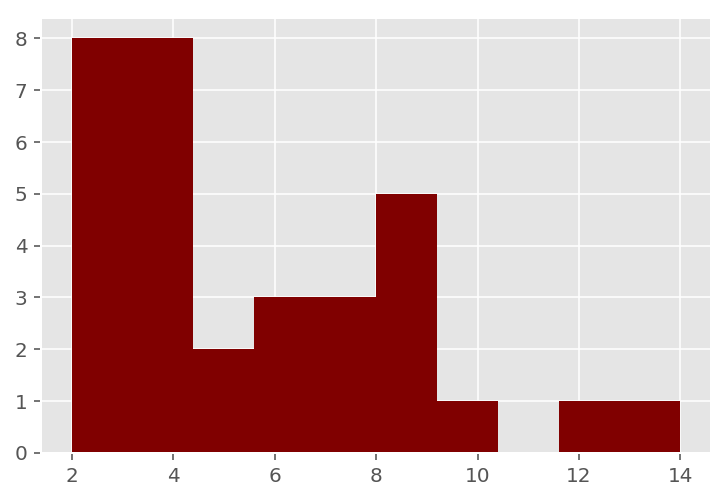

In [69]:
plt.hist(dict(nx.degree(G_davis)).values(), color = 'maroon');

* the clustering coefficients (for each node and the average, plot a histogram).

In [70]:
nx.clustering(G_davis)

{'Evelyn Jefferson': 0,
 'Laura Mandeville': 0,
 'Theresa Anderson': 0,
 'Brenda Rogers': 0,
 'Charlotte McDowd': 0,
 'Frances Anderson': 0,
 'Eleanor Nye': 0,
 'Pearl Oglethorpe': 0,
 'Ruth DeSand': 0,
 'Verne Sanderson': 0,
 'Myra Liddel': 0,
 'Katherina Rogers': 0,
 'Sylvia Avondale': 0,
 'Nora Fayette': 0,
 'Helen Lloyd': 0,
 'Dorothy Murchison': 0,
 'Olivia Carleton': 0,
 'Flora Price': 0,
 'E1': 0,
 'E2': 0,
 'E3': 0,
 'E4': 0,
 'E5': 0,
 'E6': 0,
 'E7': 0,
 'E8': 0,
 'E9': 0,
 'E10': 0,
 'E11': 0,
 'E12': 0,
 'E13': 0,
 'E14': 0}

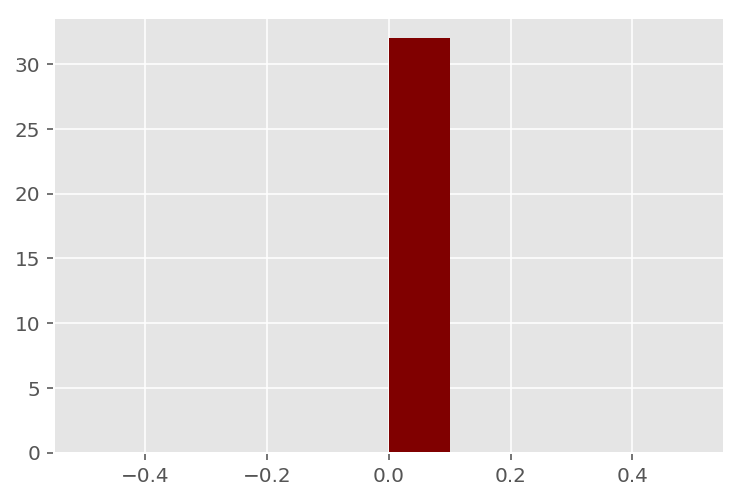

In [71]:
plt.hist(nx.clustering(G_davis).values(), color = 'maroon');

* the shortest paths for the nodes and their average length.

In [72]:
pd.DataFrame(dict(nx.shortest_path_length(G_davis)))

,Evelyn Jefferson,Laura Mandeville,Theresa Anderson,Brenda Rogers,Charlotte McDowd,Frances Anderson,Eleanor Nye,Pearl Oglethorpe,Ruth DeSand,Verne Sanderson,...,E5,E6,E7,E8,E9,E10,E11,E12,E13,E14
Brenda Rogers,2,2,2,0,2,2,2,2,2,2,...,1,1,1,1,3,3,3,3,3,3
Charlotte McDowd,2,2,2,2,0,2,2,4,2,2,...,1,3,1,3,3,3,3,3,3,3
Dorothy Murchison,2,2,2,2,4,2,2,2,2,2,...,3,3,3,1,1,3,3,3,3,3
E1,1,1,3,1,3,3,3,3,3,3,...,2,2,2,2,2,4,4,4,4,4
E10,3,3,3,3,3,3,3,3,3,3,...,4,2,2,2,2,0,2,2,2,2
E11,3,3,3,3,3,3,3,3,3,3,...,4,2,2,2,2,2,0,2,2,2
E12,3,3,3,3,3,3,3,3,3,1,...,4,2,2,2,2,2,2,0,2,2
E13,3,3,3,3,3,3,3,3,3,3,...,4,2,2,2,2,2,2,2,0,2
E14,3,3,3,3,3,3,3,3,3,3,...,4,2,2,2,2,2,2,2,2,0
E2,1,1,1,3,3,3,3,3,3,3,...,2,2,2,2,2,4,4,4,4,4


* obtain the vertex and edge betweenness ranking for each graph.

In [73]:
nx.betweenness_centrality(G_davis)

{'Evelyn Jefferson': 0.09243053952845212,
 'Laura Mandeville': 0.04914868366576943,
 'Theresa Anderson': 0.08382717212549207,
 'Brenda Rogers': 0.04735814390994237,
 'Charlotte McDowd': 0.010140350205990675,
 'Frances Anderson': 0.010253510918225078,
 'Eleanor Nye': 0.009037924491193493,
 'Pearl Oglethorpe': 0.006507836308894933,
 'Ruth DeSand': 0.01606125402625199,
 'Verne Sanderson': 0.015060776907855697,
 'Myra Liddel': 0.01564136563963574,
 'Katherina Rogers': 0.0453256463296124,
 'Sylvia Avondale': 0.06862488078028632,
 'Nora Fayette': 0.10858130346049079,
 'Helen Lloyd': 0.0405644200615806,
 'Dorothy Murchison': 0.0018695041988760154,
 'Olivia Carleton': 0.00483710716158534,
 'Flora Price': 0.00483710716158534,
 'E1': 0.00209408273924403,
 'E2': 0.0020303032187582275,
 'E3': 0.017714891753424267,
 'E4': 0.007486726470019202,
 'E5': 0.03664061940065164,
 'E6': 0.06319868906402719,
 'E7': 0.1258812653738273,
 'E8': 0.23700300426238308,
 'E9': 0.21920891071174742,
 'E10': 0.01112241

In [74]:
nx.edge_betweenness_centrality(G_davis)

{('Evelyn Jefferson', 'E1'): 0.027465889218004608,
 ('Evelyn Jefferson', 'E2'): 0.022453417255527415,
 ('Evelyn Jefferson', 'E3'): 0.01966065804540415,
 ('Evelyn Jefferson', 'E4'): 0.02274994010107757,
 ('Evelyn Jefferson', 'E5'): 0.019308450806423287,
 ('Evelyn Jefferson', 'E6'): 0.02087736646576257,
 ('Evelyn Jefferson', 'E8'): 0.040268422990335784,
 ('Evelyn Jefferson', 'E9'): 0.0630231167333123,
 ('Laura Mandeville', 'E1'): 0.019371450995393297,
 ('Laura Mandeville', 'E2'): 0.018388640530933135,
 ('Laura Mandeville', 'E3'): 0.014775803685589685,
 ('Laura Mandeville', 'E5'): 0.0148329800103923,
 ('Laura Mandeville', 'E6'): 0.01838535677343292,
 ('Laura Mandeville', 'E7'): 0.029343933200064388,
 ('Laura Mandeville', 'E8'): 0.03955561667751195,
 ('Theresa Anderson', 'E2'): 0.02546476074871112,
 ('Theresa Anderson', 'E3'): 0.02079986903776603,
 ('Theresa Anderson', 'E4'): 0.024449031029131783,
 ('Theresa Anderson', 'E5'): 0.018755453472750348,
 ('Theresa Anderson', 'E6'): 0.01895867492

* plot the graph.

C:\Users\HP-PC\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


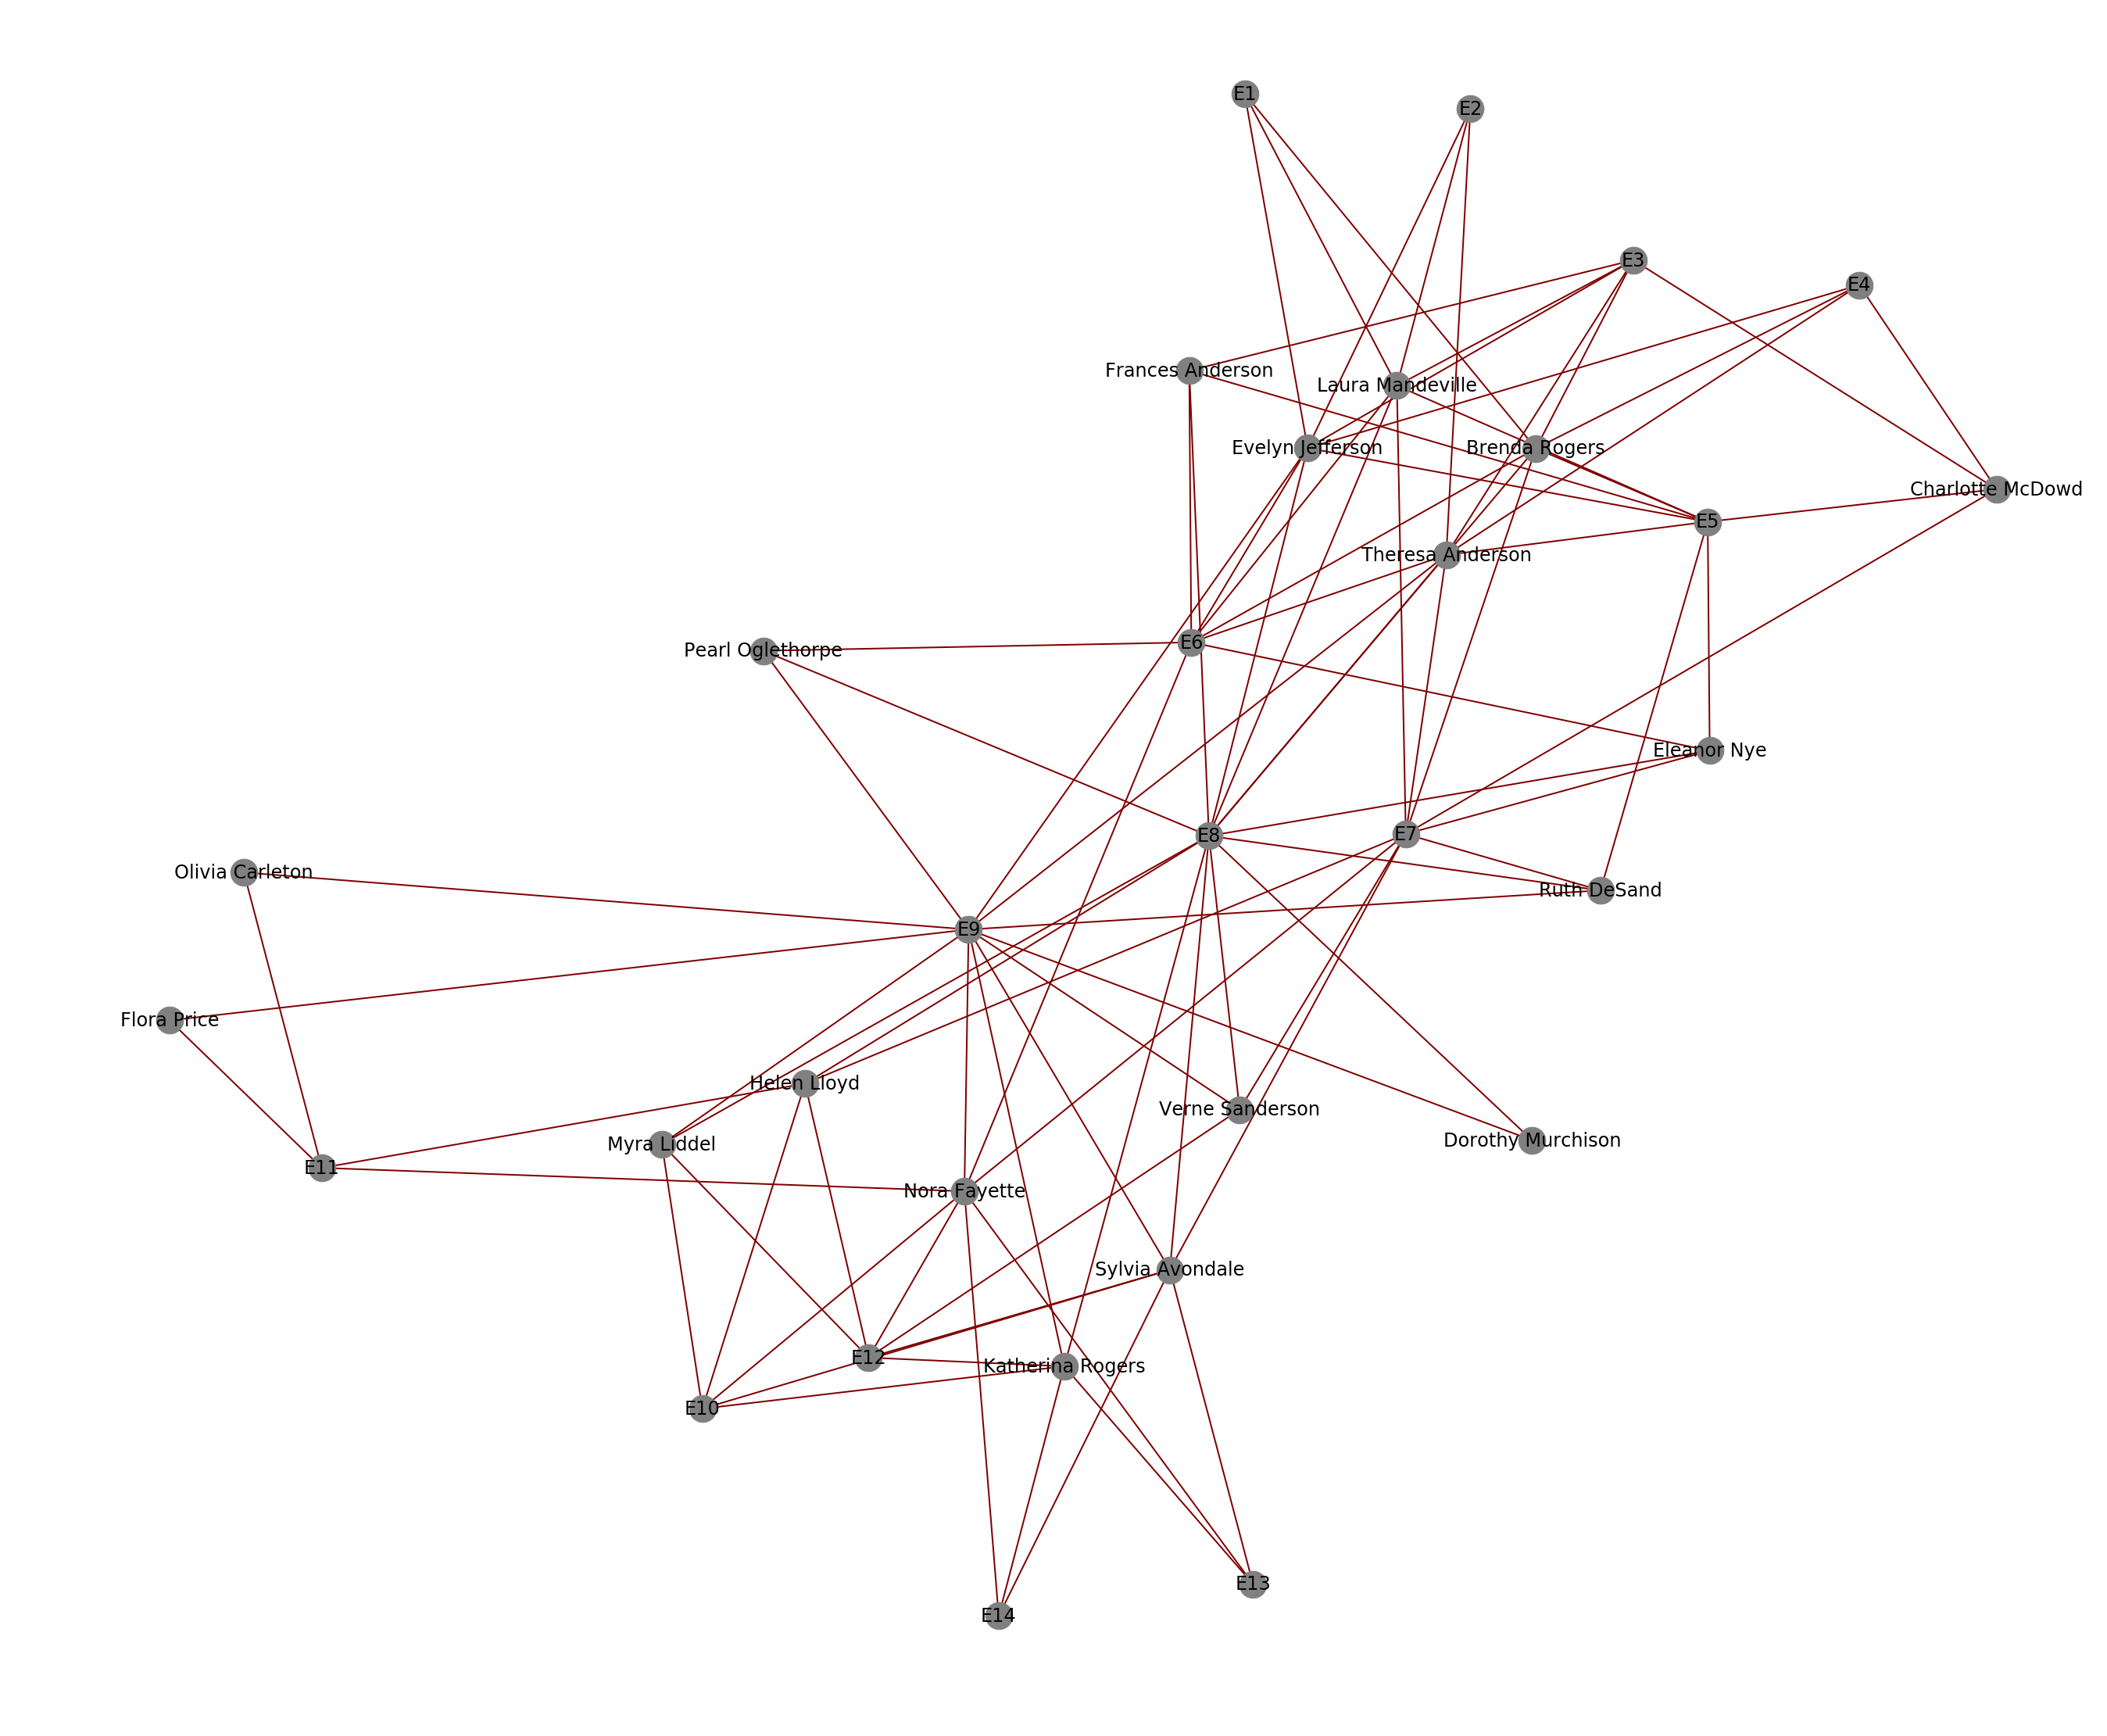

In [77]:
plt.figure(figsize=(18, 15))
nx.draw(G_davis, with_labels = True, node_color = 'gray', edge_color = 'maroon')

* use the Girvan-Newman algorithm for community detection.

In [ ]:
def Girvan_Newman(G_1):
    G = G_1.copy()
    pos = nx.drawing.spring_layout(G)
    sorted_bc = [1]
    actual_number_components = 1
    while not sorted_bc == []:
        d_edge = nx.edge_betweenness_centrality(G)
        sorted_bc = sorted(list(d_edge.items()), key=operator.itemgetter(1))
        e = sorted_bc.pop()
        print("deleting edge:", e[0], end=' ')
        G.remove_edge(*e[0])
        num_comp = nx.number_connected_components(G)
        print("...we have now ",num_comp," components")
        if num_comp > actual_number_components:
            actual_number_components = num_comp
            if num_comp < 7:
                nx.draw(G, pos,with_labels=True, node_color = 'gray', edge_color = 'maroon')
                plt.show()
                
Girvan_Newman(G_davis)

* use hierarchical clustering for community detection.
    - do you see any differences in the community structure resulting from the two algorithms?

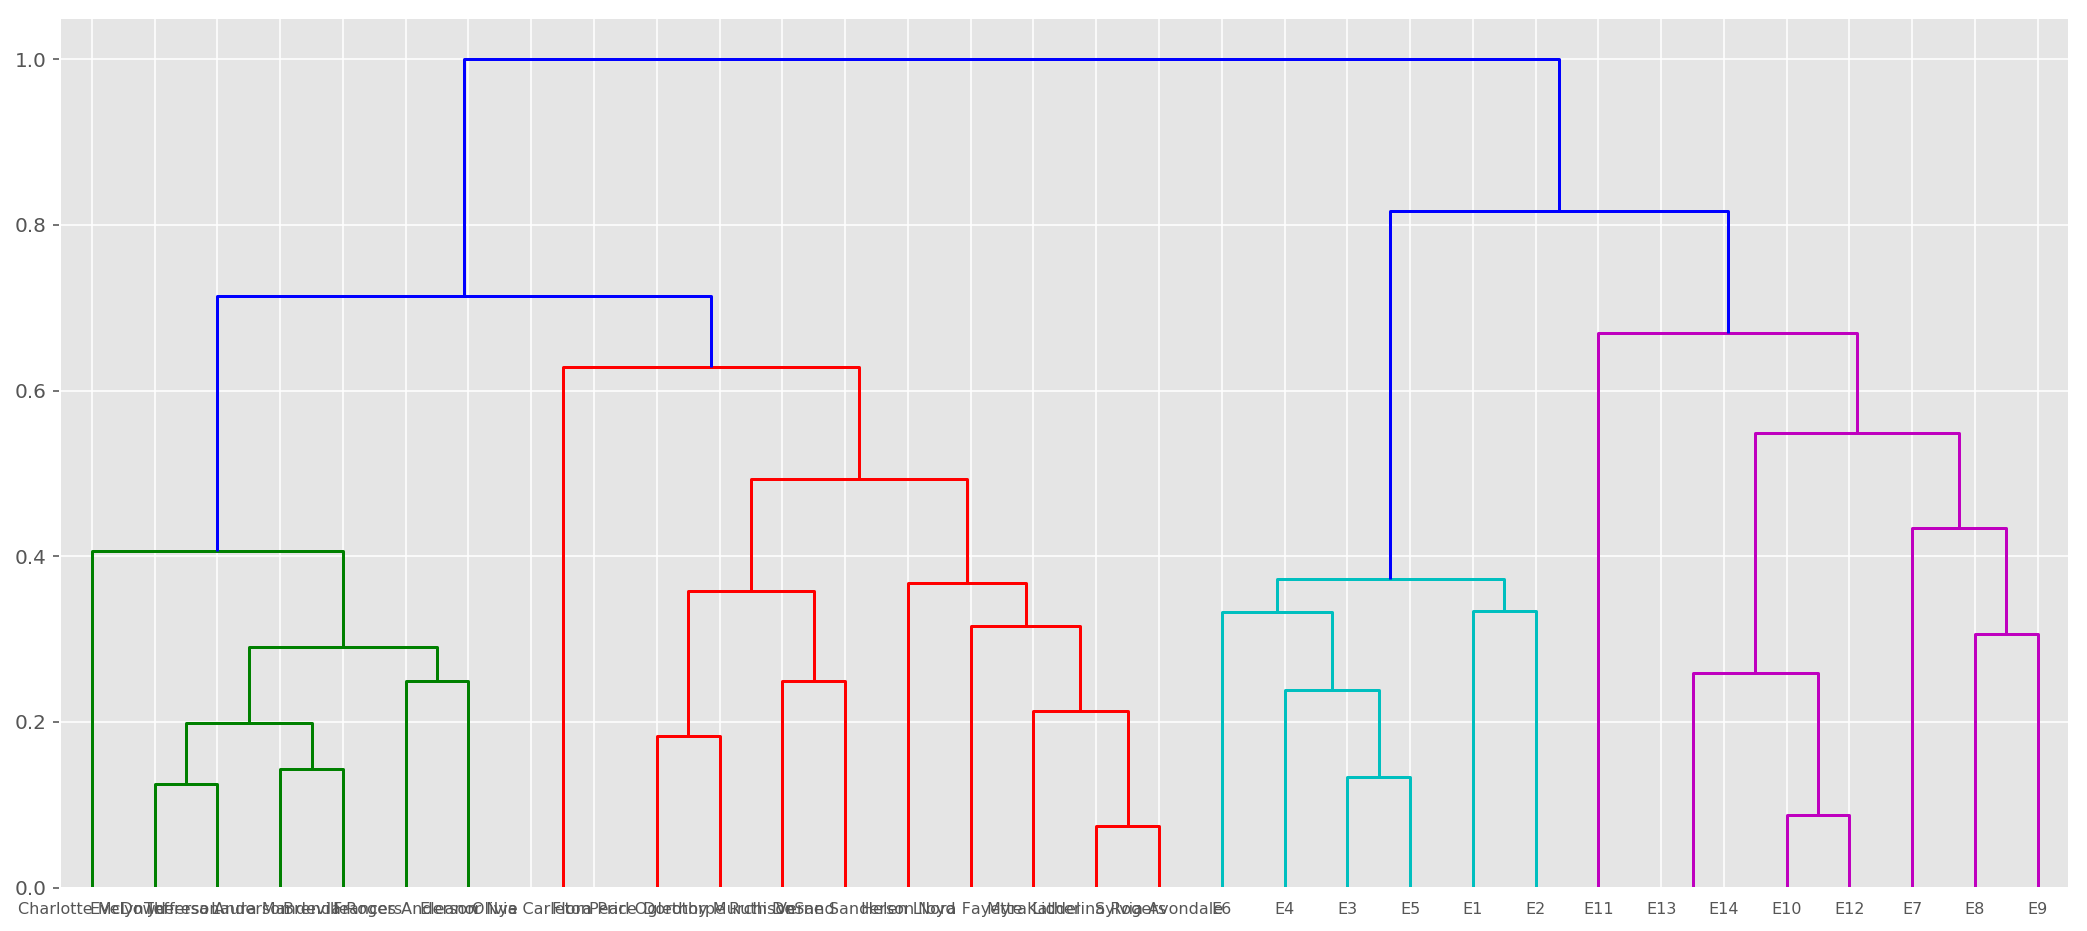

In [78]:
plt.figure(figsize=(18, 8))
A = nx.adjacency_matrix(G_davis).toarray()
dist_out = pdist(A,metric='cosine')
Z = hierarchy.linkage(dist_out,method='average')
hierarchy.dendrogram(Z,leaf_rotation=0,labels=list(G_davis.nodes()))
plt.show()